In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving movie_analysis_.csv to movie_analysis_.csv


In [ ]:
import pandas as pd
df = pd.read_csv('movie_analysis_.csv')
df.head()



,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
df.shape

(1000, 16)

In [ ]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [ ]:
df = df.drop_duplicates()

In [ ]:
print(df['Genre'].value_counts().head(10))

Genre
Drama                           85
Drama, Romance                  37
Comedy, Drama                   35
Comedy, Drama, Romance          31
Action, Crime, Drama            30
Biography, Drama, History       28
Crime, Drama, Thriller          28
Crime, Drama, Mystery           27
Crime, Drama                    26
Animation, Adventure, Comedy    24
Name: count, dtype: int64


In [ ]:
print(df['IMDB_Rating'].value_counts())

IMDB_Rating
7.7    157
7.8    151
8.0    141
8.1    127
7.6    123
7.9    106
8.2     67
8.3     44
8.4     31
8.5     20
8.6     15
8.7      5
8.8      5
8.9      3
9.0      3
9.3      1
9.2      1
Name: count, dtype: int64


In [ ]:
print(df.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False))

Genre
Animation, Drama, War         8.50
Action, Sci-Fi                8.40
Drama, Musical                8.40
Drama, Mystery, War           8.35
Western                       8.35
                              ... 
Action, Adventure, Mystery    7.60
Action, Adventure, Family     7.60
Action, Adventure, Crime      7.60
Animation, Drama, Romance     7.60
Drama, War, Western           7.60
Name: IMDB_Rating, Length: 202, dtype: float64


In [ ]:
df.sort_values(by='IMDB_Rating', ascending=False).head(10)
high_quality = df[(df['IMDB_Rating'] >= 8.0) & (df['No_of_Votes'] > 1000)]
high_quality[['Series_Title', 'IMDB_Rating', 'No_of_Votes']]

,Series_Title,IMDB_Rating,No_of_Votes
0,The Shawshank Redemption,9.3,2343110
1,The Godfather,9.2,1620367
2,The Dark Knight,9.0,2303232
3,The Godfather: Part II,9.0,1129952
4,12 Angry Men,9.0,689845
...,...,...,...
458,The Wizard of Oz,8.0,371379
459,La règle du jeu,8.0,26725
460,The Thin Man,8.0,26642
461,All Quiet on the Western Front,8.0,57318


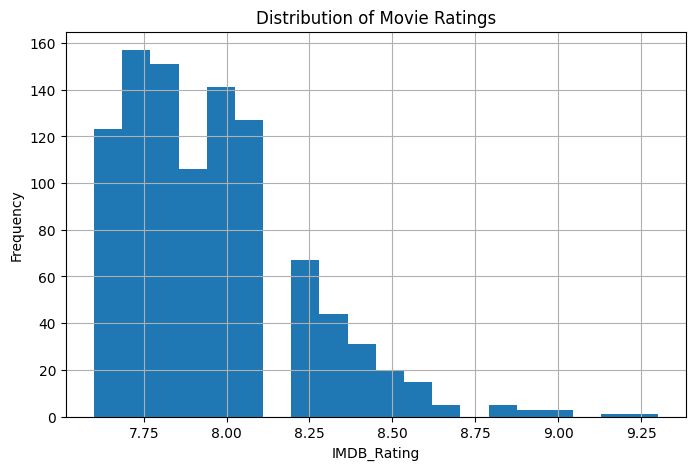

In [ ]:
df['IMDB_Rating'].hist(bins=20, figsize=(8, 5))
plt.xlabel('IMDB_Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

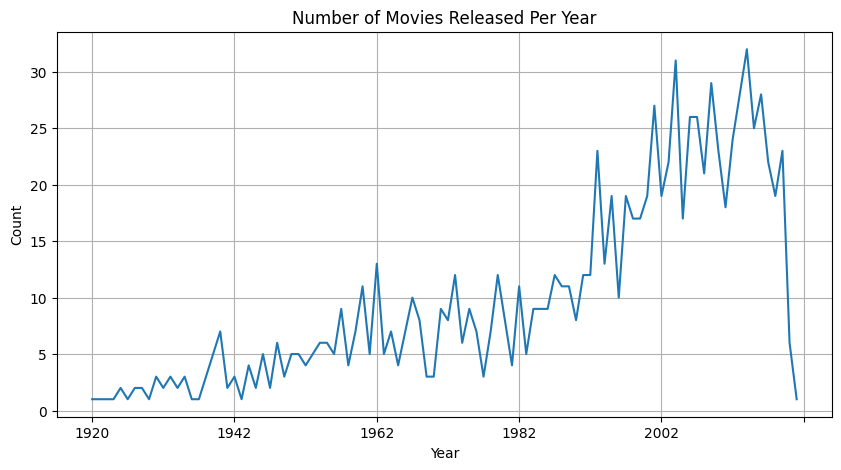

In [ ]:
df['Released_Year'].value_counts().sort_index().plot(kind='line', figsize=(10, 5))
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [ ]:
df.to_csv("movie_analysis_.csv", index=False)